# # ---------------------------------------------------------------------------------------------------
Learning:
1. As observed in previous analysis, data are clustered in Agencia_ID and Producto_ID domain.
2. However,trends are not clear in each cluster. ==> Must join all tables and analyze with new features from the 

# # ---------------------------------------------------------------------------------------------------
# Load tables in dataframes and pre-process them for exploratory analysis

In [99]:
# import modules
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import seaborn as sns
%matplotlib inline

# #----------------------------------------------------------------------------------------------------
# Load 1/500 fraction of train.csv

In [190]:
# load training data
f = "./input/train.csv"
# read every 500th row
n = 200000
# Count the lines or use on upper bound
num_lines = sum(1 for l in open(f))
print(num_lines)
# generate row indices to skip - make sure 0 is not included to keep the header!
skip_idx = [x for x in range(1, num_lines) if x %n != 0]
train = pd.read_csv(f,skiprows=skip_idx,
                   dtype = {'Semana':'int32',
                            'Agencia_ID':'int32',
                            'Canal_ID':'int32',
                            'Ruta_SAK':'int32',
                            'Cliente_ID':'int32',
                            'Producto_ID':'int32',
                            'Venta_uni_hoy':'int32',
                            'Venta_hoy':'float32',
                            'Dev_uni_proxima':'int32',
                            'Dev_proxima':'float32',
                            'Demanda_uni_equil':'int32'})
# drop unnecessary features
train = train.drop(['Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima'], axis=1)

74180465


In [191]:
train.head()
print(train.shape)

(370, 7)


# #---------------------------------------------------------------------------------------
# Select clusters

In [193]:
train['c1']=0
# cluster 1
train.ix[(train['Agencia_ID']>=-500) & (train['Agencia_ID']<=12500) 
                 & (train['Producto_ID']>=-500) & (train['Producto_ID']<=20000),'c1']=1
# cluster 2
train.ix[(train['Agencia_ID']>=12500) & (train['Agencia_ID']<=27500) 
          & (train['Producto_ID']>=-500) & (train['Producto_ID']<=20000),'c1']=2
# cluster 3
train.ix[(train['Agencia_ID']>=-500) & (train['Agencia_ID']<=12500) 
          & (train['Producto_ID']>=20000) & (train['Producto_ID']<=65000),'c1']=3
# cluster 4
train.ix[(train['Agencia_ID']>=12500) & (train['Agencia_ID']<=27500) 
          & (train['Producto_ID']>=20000) & (train['Producto_ID']<=65000),'c1']=4
# sns.distplot(train['c1'],bins=20);
# train

# Plot four clusters

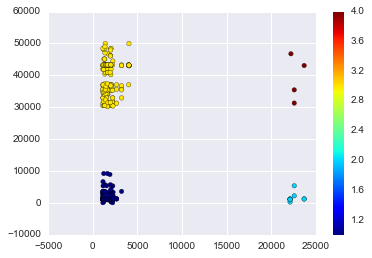

In [194]:
# g = sns.FacetGrid(train,hue = 'c1')
# g.map(plt.scatter,"Agencia_ID","Producto_ID")
# for ax in g.axes.flat:  
#     plt.setp(ax.get_xticklabels(), rotation=45)
points=plt.scatter(x='Agencia_ID',y='Producto_ID',data=train, c = train['c1'],cmap = 'jet')
plt.colorbar(points)

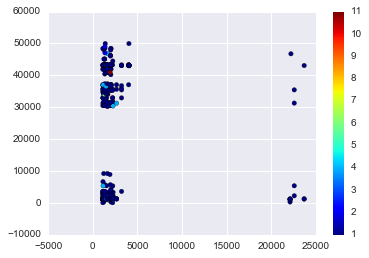

In [195]:
# g = sns.FacetGrid(train,hue = 'Canal_ID')
# g.map(plt.scatter,"Agencia_ID","Producto_ID")
# for ax in g.axes.flat:  
#     plt.setp(ax.get_xticklabels(), rotation=45)
points=plt.scatter(x='Agencia_ID',y='Producto_ID',data=train, c = train['Canal_ID'],cmap = 'jet')
plt.colorbar(points)

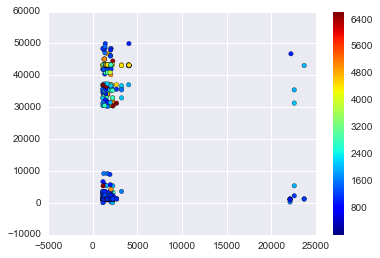

In [196]:
# g = sns.FacetGrid(train,hue = 'Ruta_SAK')
# g.map(plt.scatter,"Agencia_ID","Producto_ID")
# for ax in g.axes.flat:  
#     plt.setp(ax.get_xticklabels(), rotation=45)
points=plt.scatter(x='Agencia_ID',y='Producto_ID',data=train, c = train['Ruta_SAK'],cmap = 'jet')
plt.colorbar(points)

# #------------------------------------------------------------------------------------
# Load other tables

In [197]:
# load town_state, producto_tabla, cliente_tabla tables
town_state = pd.read_csv("./input/town_state.csv")
producto_tabla = pd.read_csv("./input/producto_tabla.csv")
cliente_tabla = pd.read_csv("./input/cliente_tabla.csv")

In [204]:
# merge train with other tables
jtrain = pd.merge(train, cliente_tabla, how = 'left', on='Cliente_ID')
jtrain = pd.merge(jtrain, producto_tabla, how = 'left', on='Producto_ID')
jtrain = pd.merge(jtrain, town_state, how = 'left', on='Agencia_ID')
print(jtrain.shape)
print(train.shape)
jtrain
# train.head

(374, 12)
(370, 8)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,c1,NombreCliente,NombreProducto,Town,State
0,3,1116,1,1466,2309869,1278,13,1,UNION DEL VALLE 2,Nito 1p 62g BIM 1278,2011 AG. SAN ANTONIO,"MÉXICO, D.F."
1,3,1119,1,1217,59750,1064,1,1,ORTEGA,Panque Marmol 255g BIM 1064,2013 AG. MEGA NAUCALPAN,ESTADO DE MÉXICO
2,3,1122,1,1064,1251494,1125,4,1,PILAR,Tortillinas 10p 255g TR 1125,2019 AG. XALOSTOC,ESTADO DE MÉXICO
3,3,1124,1,1472,1133556,1216,2,1,ABARROTES LA HIDALGUENCE,Roles Glass 2p 135g BIM 1216,2021 AG. XOCHIMILCO 2,"MÉXICO, D.F."
4,3,1130,1,1217,4131120,1278,6,1,NO IDENTIFICADO,Nito 1p 62g BIM 1278,2010 AG. LOS REYES,ESTADO DE MÉXICO
5,3,1140,1,1209,593894,1220,2,1,EL BUHO,Colchones 6p 130g BIM 1220,2078 AG. TEXCOCO,ESTADO DE MÉXICO
6,3,1153,1,4427,822262,36598,3,3,CASA GONZALEZ,Animalitos Karamelo Hierro 200g MTA LAR 36598,2087 AG. TIZAYUCA,HIDALGO
7,3,1215,1,2102,197756,36747,1,3,JUDITH,Triki Trakes Tubo 200g MTB MLA 36747,2049 AG. IZTAPALAPA 1,"MÉXICO, D.F."
8,3,1219,1,1616,1695688,9217,4,1,DOMINGUEZ,Cuernitos Famili Pack 3p 150g TR 9217,2042 AG. TEPOZOTLAN,ESTADO DE MÉXICO
9,3,1222,1,1419,42698,1232,6,1,KARLA,Panque Nuez 255g BIM 1232,2088 AG. CEYLAN,"MÉXICO, D.F."


In [203]:
train

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,c1
0,3,1116,1,1466,2309869,1278,13,1
1,3,1119,1,1217,59750,1064,1,1
2,3,1122,1,1064,1251494,1125,4,1
3,3,1124,1,1472,1133556,1216,2,1
4,3,1130,1,1217,4131120,1278,6,1
5,3,1140,1,1209,593894,1220,2,1
6,3,1153,1,4427,822262,36598,3,3
7,3,1215,1,2102,197756,36747,1,3
8,3,1219,1,1616,1695688,9217,4,1
9,3,1222,1,1419,42698,1232,6,1


# #-------------------------------------------------------------------------------------

# Crossplot cluster 1

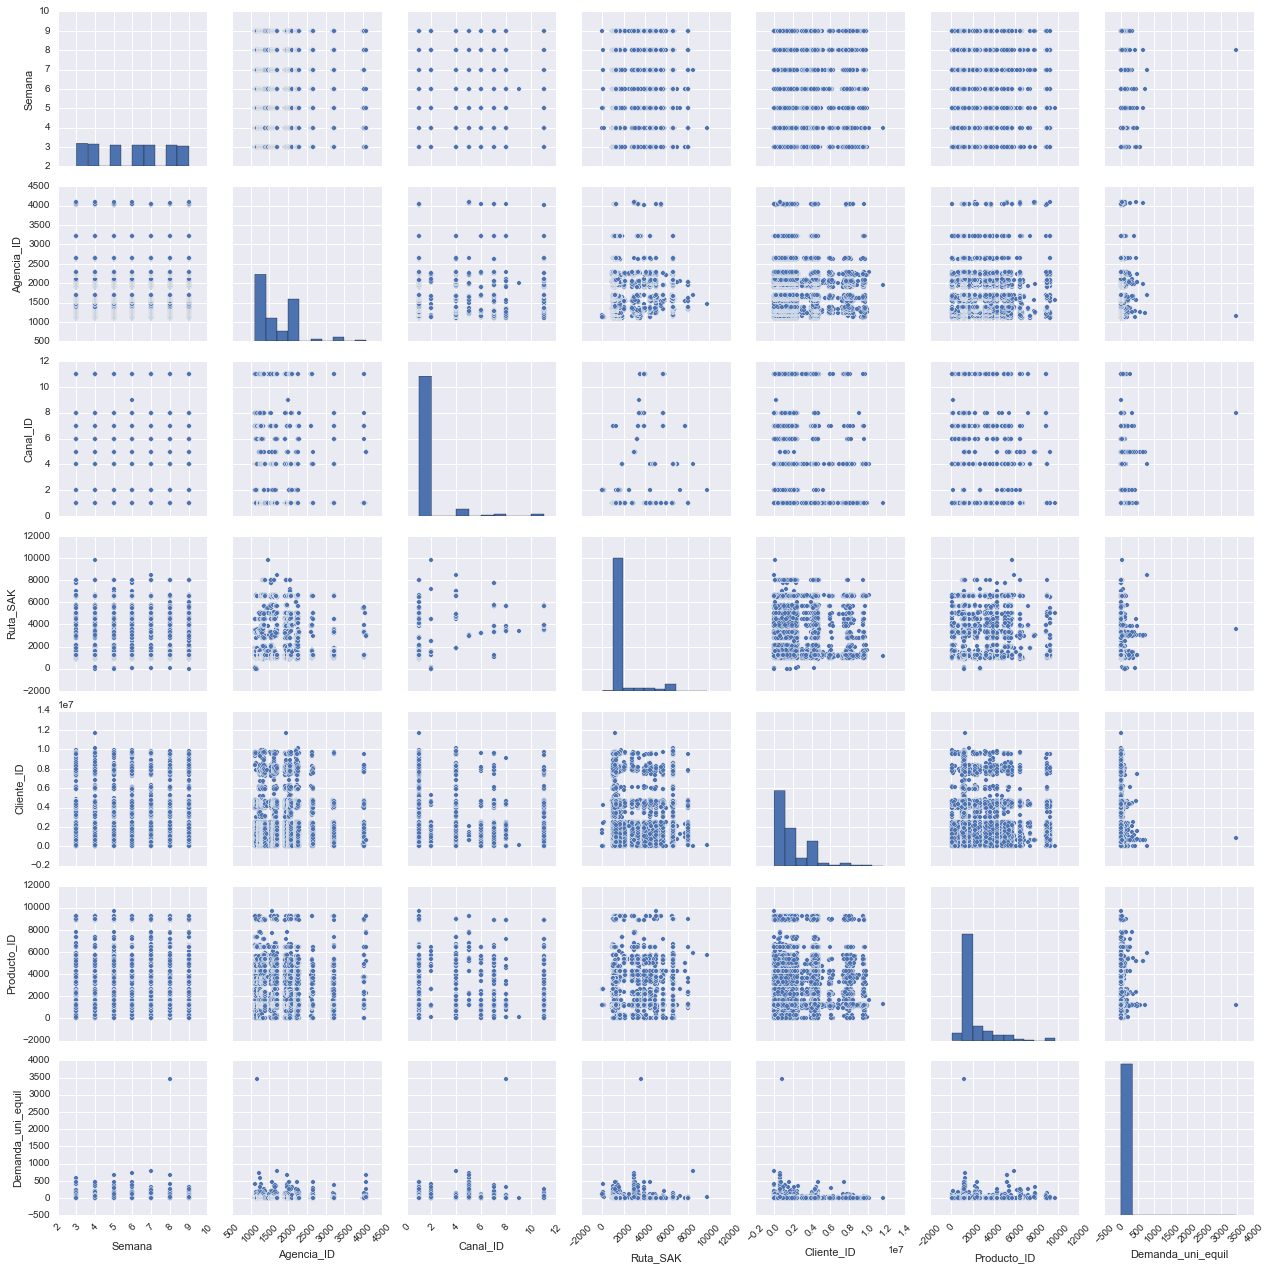

In [118]:
g = sns.pairplot(train.ix[(train['c1']==1),0:7],diag_kind='hist')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)

# List Agencia, Producto, and Cliente information for cluster 1

In [128]:
c1 = jtrain.ix[(jtrain['c1']==1)]
c1

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,c1,NombreCliente,NombreProducto,Town,State
0,3,1110,7,3301,4603047,1220,5,1,NO IDENTIFICADO,Colchones 6p 130g BIM 1220,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,3,1110,7,3303,1453543,4280,6,1,PUESTO DE REVISTAS,Doraditas 110g TR 4280,2008 AG. LAGO FILT,"MÉXICO, D.F."
2,4,1110,7,3316,4314832,4280,4,1,NO IDENTIFICADO,Doraditas 110g TR 4280,2008 AG. LAGO FILT,"MÉXICO, D.F."
3,5,1110,7,3309,4527163,4280,8,1,NO IDENTIFICADO,Doraditas 110g TR 4280,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,8,1110,7,3319,4372181,4280,55,1,NO IDENTIFICADO,Doraditas 110g TR 4280,2008 AG. LAGO FILT,"MÉXICO, D.F."
8,3,1110,7,3307,1631915,3894,6,1,PUESTO DE DULCES BLANCO,Sponch 8p 120g MLA 3894,2008 AG. LAGO FILT,"MÉXICO, D.F."
9,5,1110,7,3309,25148,3894,23,1,PRIMER BATALLON DE INFANTERIA,Sponch 8p 120g MLA 3894,2008 AG. LAGO FILT,"MÉXICO, D.F."
10,8,1110,7,3317,4216647,3894,16,1,NO IDENTIFICADO,Sponch 8p 120g MLA 3894,2008 AG. LAGO FILT,"MÉXICO, D.F."
19,3,1110,7,3313,4289409,1146,16,1,NO IDENTIFICADO,Pan Integral 675g BIM 1146,2008 AG. LAGO FILT,"MÉXICO, D.F."
20,4,1110,7,3303,2340613,1146,16,1,TAMALES SILVIA,Pan Integral 675g BIM 1146,2008 AG. LAGO FILT,"MÉXICO, D.F."


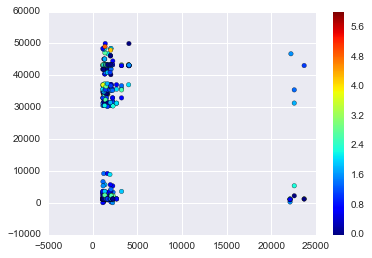

In [208]:
points=plt.scatter(x='Agencia_ID',y='Producto_ID',data=jtrain, c = np.log(jtrain['Demanda_uni_equil']),cmap = 'jet')
plt.colorbar(points);

# Crossplot cluster 2

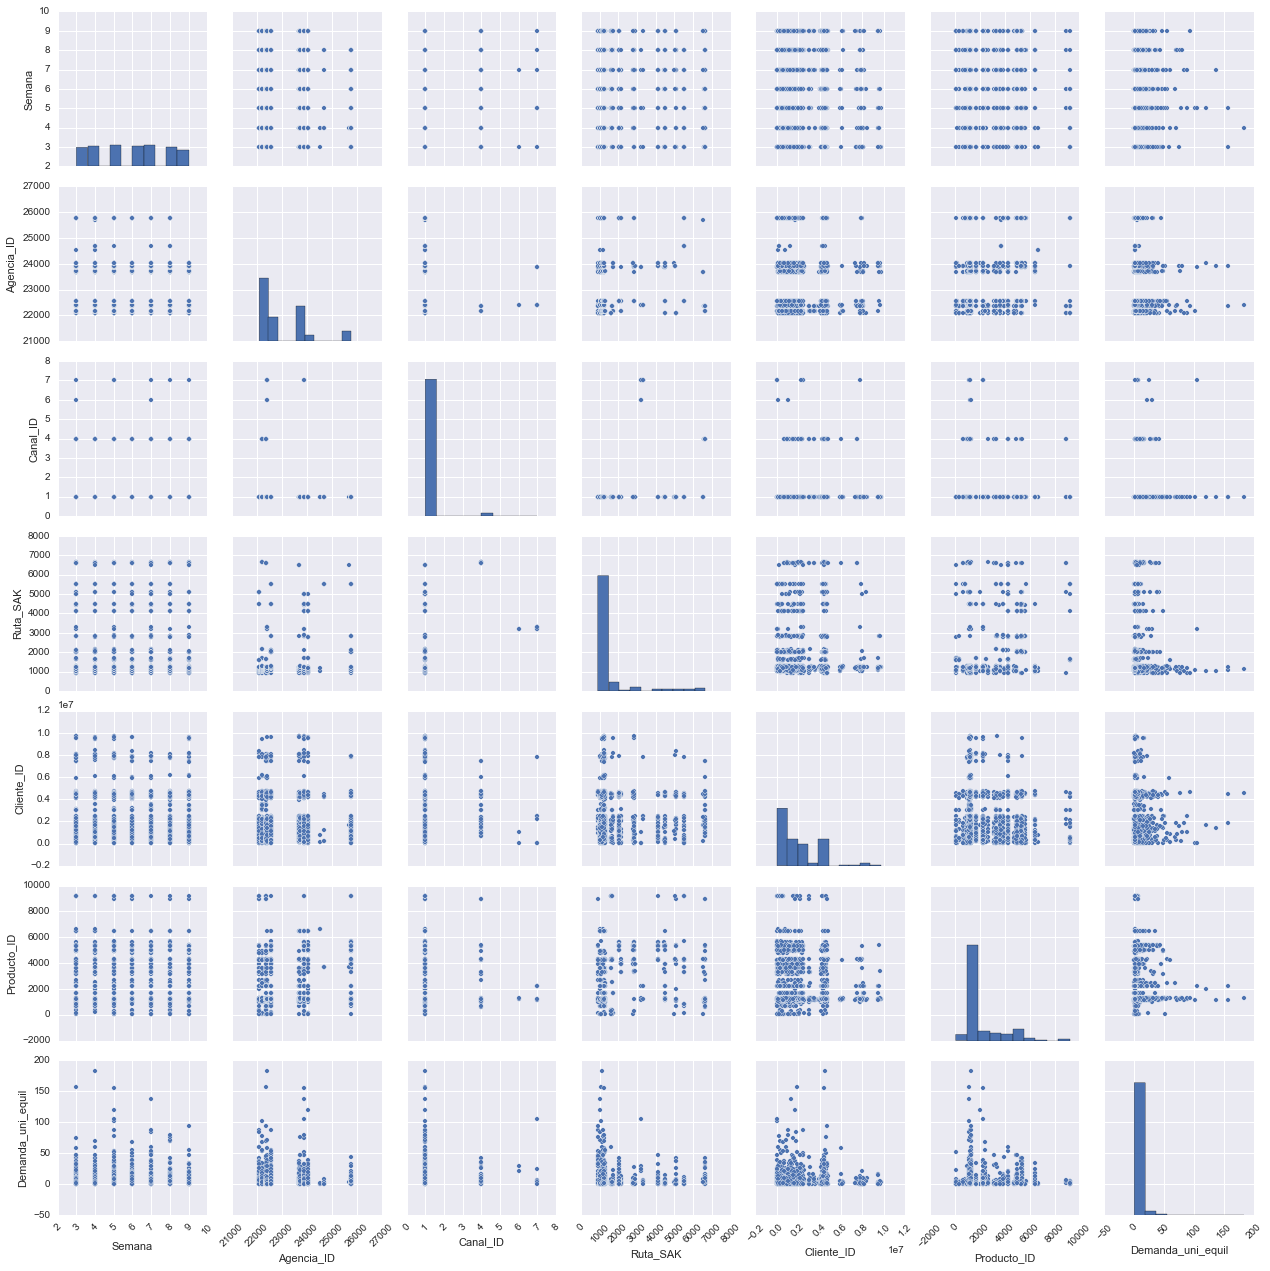

In [109]:
g = sns.pairplot(train.ix[(train['c1']==2),0:7],diag_kind='hist')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)

# List Agencia, Producto, and Cliente information for cluster 1

In [129]:
c2 = jtrain.ix[(jtrain['c1']==2)]
c2

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,c1,NombreCliente,NombreProducto,Town,State
84913,6,22362,1,1156,3011234,1220,4,2,DORIS,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84914,3,22362,1,1161,278871,1220,5,2,CASA IVAN,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84915,3,22362,1,1230,7797308,1220,3,2,KORA,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84916,3,22362,1,1236,1723910,1220,2,2,JUNIOR,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84917,4,22362,1,1161,7526901,1220,4,2,RECAUDERIA ORTIZ,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84918,4,22362,1,1163,505510,1220,1,2,CONASUPO HDZ,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84919,4,22362,1,1244,539719,1220,1,2,LA PREFERIDA,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84920,5,22362,1,1163,301743,1220,3,2,DICONSA,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84921,7,22362,1,1231,311136,1220,3,2,EL TEPEYAC,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO
84922,6,22362,1,1233,1503939,1220,5,2,VIDEO JUEGOS CHUY,Colchones 6p 130g BIM 1220,2362 AG.PACHUCA,HIDALGO


In [ ]:
#

# Crossplot cluster 3

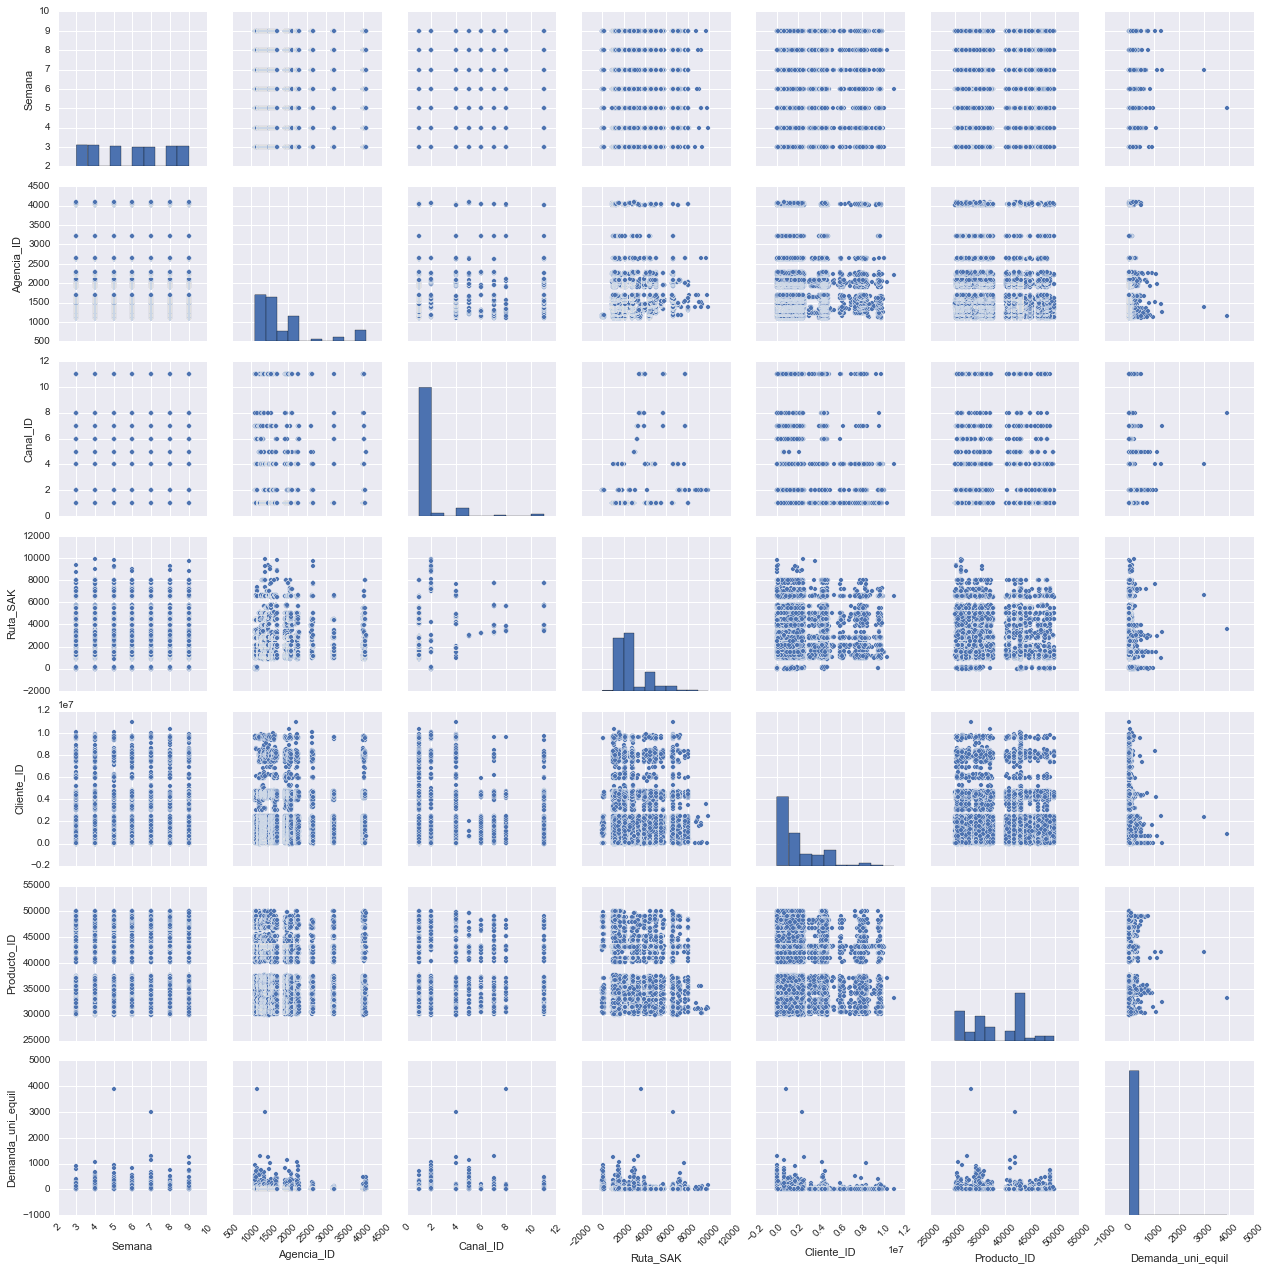

In [110]:
g = sns.pairplot(train.ix[(train['c1']==3),0:7],diag_kind='hist')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)

# List Agencia, Producto, and Cliente information for cluster 3

In [130]:
c3 = jtrain.ix[(jtrain['c1']==3)]
c3

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,c1,NombreCliente,NombreProducto,Town,State
5,3,1110,7,3305,817203,47336,18,3,GERONIMO,Medias Noches FS 8p 340g BIM 47336,2008 AG. LAGO FILT,"MÉXICO, D.F."
6,4,1110,7,3305,4251500,47336,2,3,NO IDENTIFICADO,Medias Noches FS 8p 340g BIM 47336,2008 AG. LAGO FILT,"MÉXICO, D.F."
7,3,1110,7,3306,1546504,34053,7,3,OFICINAS DE TELMEX,Nito 1p 62g SP BIM 34053,2008 AG. LAGO FILT,"MÉXICO, D.F."
11,3,1110,7,3309,124805,30214,1,3,PUESTOS,Tartinas Fresa 8p 104g TR 30214,2008 AG. LAGO FILT,"MÉXICO, D.F."
12,6,1110,7,3309,124805,30574,12,3,PUESTOS,Barritas Pina 67g MLA 30574,2008 AG. LAGO FILT,"MÉXICO, D.F."
13,4,1110,7,3314,1030947,30574,3,3,GINOS CAFEE,Barritas Pina 67g MLA 30574,2008 AG. LAGO FILT,"MÉXICO, D.F."
14,5,1110,7,3314,16127,30574,7,3,UNIVERSIDAD LATINA,Barritas Pina 67g MLA 30574,2008 AG. LAGO FILT,"MÉXICO, D.F."
15,3,1110,7,3310,90301,32802,75,3,HOTEL FIESTA AMERICANA GRAND,Tortillas de Maiz 800g MR 32802,2008 AG. LAGO FILT,"MÉXICO, D.F."
16,3,1110,7,3311,4660856,37057,3,3,NO IDENTIFICADO,Choco Roles 2p 80g MLA 37057,2008 AG. LAGO FILT,"MÉXICO, D.F."
17,6,1110,7,3318,4299542,37057,2,3,NO IDENTIFICADO,Choco Roles 2p 80g MLA 37057,2008 AG. LAGO FILT,"MÉXICO, D.F."


# Crossplot cluster 4

In [177]:
hue = train.ix[(train['c1']==4)]
print(hue.shape)
jhue = jtrain.ix[(jtrain['c1']==4)]
print(jhue.shape)
# g = sns.pairplot(train.ix[(train['c1']==4),0:7],diag_kind='hist',hue=hue)
# for ax in g.axes.flat:
#     plt.setp(ax.get_xticklabels(),rotation=45)

(2651, 8)
(2664, 12)


# List Agencia, Producto, and Cliente information for cluster 4

In [133]:
c4 = jtrain.ix[(jtrain['c1']==4)]
c4

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,c1,NombreCliente,NombreProducto,Town,State
84935,3,22362,4,6613,4367259,34053,37,4,NO IDENTIFICADO,Nito 1p 62g SP BIM 34053,2362 AG.PACHUCA,HIDALGO
84936,9,22362,4,6605,1635465,34053,30,4,OXXO ACTOPAN,Nito 1p 62g SP BIM 34053,2362 AG.PACHUCA,HIDALGO
84937,4,22362,4,6613,4248976,30574,19,4,NO IDENTIFICADO,Barritas Pina 67g MLA 30574,2362 AG.PACHUCA,HIDALGO
84938,6,22362,4,6606,4443970,37057,19,4,NO IDENTIFICADO,Choco Roles 2p 80g MLA 37057,2362 AG.PACHUCA,HIDALGO
84956,3,22362,1,1651,294422,35144,1,4,LA UNION,Wonder 100pct con Ajonjoli 567g WON 35144,2362 AG.PACHUCA,HIDALGO
84957,7,22362,1,1655,653223,35144,2,4,MARTHITA,Wonder 100pct con Ajonjoli 567g WON 35144,2362 AG.PACHUCA,HIDALGO
85031,4,22362,1,2113,108220,31310,1,4,MONY,Canelitas 90g MTB MLA 31310,2362 AG.PACHUCA,HIDALGO
85032,4,22362,1,2114,4479899,31310,3,4,NO IDENTIFICADO,Canelitas 90g MTB MLA 31310,2362 AG.PACHUCA,HIDALGO
85033,4,22362,1,2814,1111576,31310,4,4,ESPERANZA,Canelitas 90g MTB MLA 31310,2362 AG.PACHUCA,HIDALGO
85034,5,22362,1,2113,533551,31310,1,4,LA PERLA,Canelitas 90g MTB MLA 31310,2362 AG.PACHUCA,HIDALGO


In [123]:
# check the outlier
jc1 = jtrain.ix[jtrain['Demanda_uni_equil']>3000]
jc1

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil,c1,NombreCliente,NombreProducto,Town,State
149302,7,1379,4,6656,2387266,42086,3003,3,OXXO ALEMANIA,Sandwich Linaza 179g CU LON 42086,2330 TLAQUEPARQUE,JALISCO
149520,5,1160,8,3601,827594,33198,3904,3,MC DONALDS ANTONIO CUAUTITLAN,Bollo Angus McDonalds 40p 2880g BIM 33198,2089 AG. AZCAPOTZALCO INSTITUCIONALES,"MÉXICO, D.F."
149521,8,1160,8,3601,827594,1166,3456,1,MC DONALDS ANTONIO CUAUTITLAN,Bollo Regular 2pq 30p McD BIM 1166,2089 AG. AZCAPOTZALCO INSTITUCIONALES,"MÉXICO, D.F."
